     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

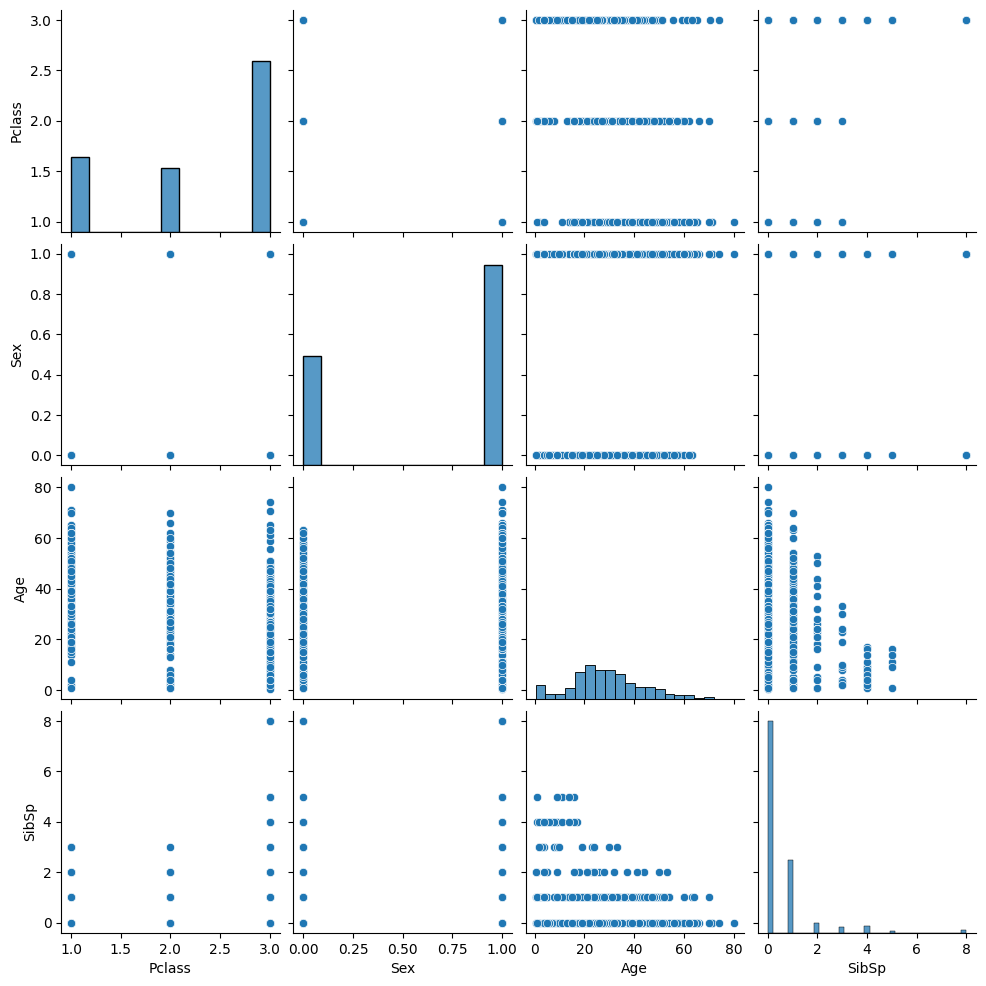

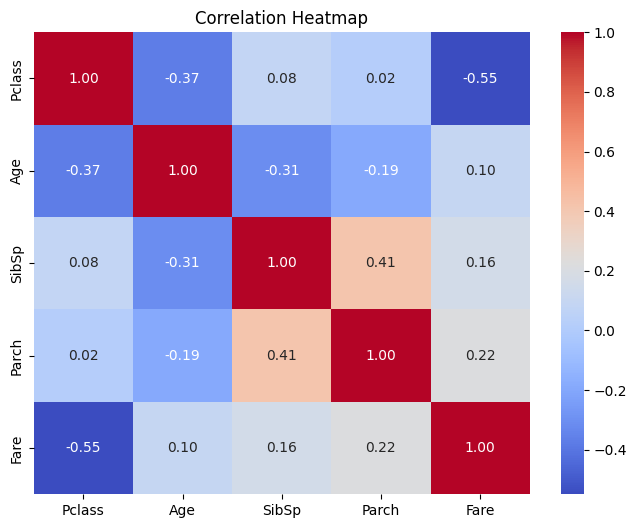

In [ ]:
#Data preprocessing & Cleaning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
df=pd.read_csv("Titanic-Dataset.csv")
print(df)
print(df.head)
print(df.dtypes)
print(df.isnull().sum())

df['Age_ffill'] = df['Age'].ffill()
df['Age_bfill'] = df['Age'].bfill()
print(df[['Age', 'Age_ffill', 'Age_bfill']].head(10))
missing_indices = df[df['Cabin'].isnull()].index
indices_to_fill = missing_indices[:5]
df.loc[indices_to_fill, 'Cabin'] = 'unknown'
print(df['Cabin'].isnull().sum())
print(df.loc[indices_to_fill, 'Cabin'])

df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)
num_duplicates = df.shape[0] - df_cleaned.shape[0]
print(f"Removed {num_duplicates} duplicate rows.")

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
print(df['Sex'].head())

scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])
print(df[['Fare', 'Fare_scaled']].head())

selected_features = ['Pclass', 'Sex', 'Age', 'SibSp']
sns.pairplot(df[selected_features])
plt.show()

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. Data Loaded Successfully.

2. Data Shape: (891, 12)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Data Description:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
uniqu

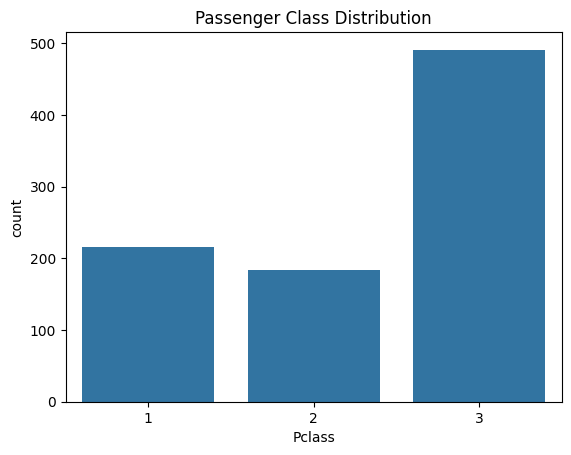


7. Female passengers who survived:
                                                  Name     Sex  Survived
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female         1
2                               Heikkinen, Miss. Laina  female         1
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female         1
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female         1
9                  Nasser, Mrs. Nicholas (Adele Achem)  female         1
..                                                 ...     ...       ...
874              Abelson, Mrs. Samuel (Hannah Wizosky)  female         1
875                   Najib, Miss. Adele Kiamie "Jane"  female         1
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female         1
880       Shelley, Mrs. William (Imanita Parrish Hall)  female         1
887                       Graham, Miss. Margaret Edith  female         1

[233 rows x 3 columns]

8. Passengers in 3rd class and under the age of 18:
           

In [ ]:
#Exp 2 Data discovery & EDA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


df = pd.read_csv('Titanic-Dataset.csv')
print("1. Data Loaded Successfully.")


print("\n2. Data Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nData Description:")
print(df.describe(include='all'))


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
print("\n3. Missing values in Age filled using mean with SimpleImputer.")

df['Cabin'] = df['Cabin'].fillna('Unknown')
print("\n4. Missing values in Cabin filled with 'Unknown'.")


mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
print(f"\n5. Missing Embarked values filled with mode: '{mode_embarked}'.")

print("\n6. Countplot of Passenger Class:")
sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
print("\n7. Female passengers who survived:")
print(female_survivors[['Name', 'Sex', 'Survived']])

young_3rd_class = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\n8. Passengers in 3rd class and under the age of 18:")
print(young_3rd_class[['Name', 'Pclass', 'Age']])

class1_older40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\n9. Passengers in Class 1 and older than 40:")
print(class1_older40[['Name', 'Pclass', 'Age']])


class1_older40_survived = class1_older40[class1_older40['Survived'] == 1]
print("\n10. Survived passengers in Class 1 and older than 40:")
print(class1_older40_survived[['Name', 'Pclass', 'Age', 'Survived']])


rich_males = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\n11. Male passengers who paid a fare greater than 100:")
print(rich_males[['Name', 'Sex', 'Fare']])


embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\n12. Passengers who embarked from 'C' and were in Class 2:")
print(embarked_C_class2[['Name', 'Embarked', 'Pclass']])


sibsp_more_than2 = df[df['SibSp'] > 2]
print("\n13. Passengers with more than 2 siblings/spouses aboard:")
print(sibsp_more_than2[['Name', 'SibSp']])


no_family_no_survive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\n14. Passengers who did not survive and had no family aboard:")
print(no_family_no_survive[['Name', 'Survived', 'SibSp', 'Parch']])

oldest_survivors = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\n15. Top 5 oldest passengers who survived:")
print(oldest_survivors[['Name', 'Age', 'Survived']])

zero_fare_passengers = df[df['Fare'] == 0]
print("\n16. Passengers who paid zero fare:")
print(zero_fare_passengers[['Name', 'Fare']])

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print("\n17. Dataset split into training and testing:")
print("Training Set Size:", train_data.shape)
print("Testing Set Size:", test_data.shape)